In [54]:
library(quantmod)
library(forecast)

In [25]:
# Apple daily prices

getSymbols("AAPL", 
           from = "2015-01-01", 
           to = "2019-12-31")

[1] "AAPL"

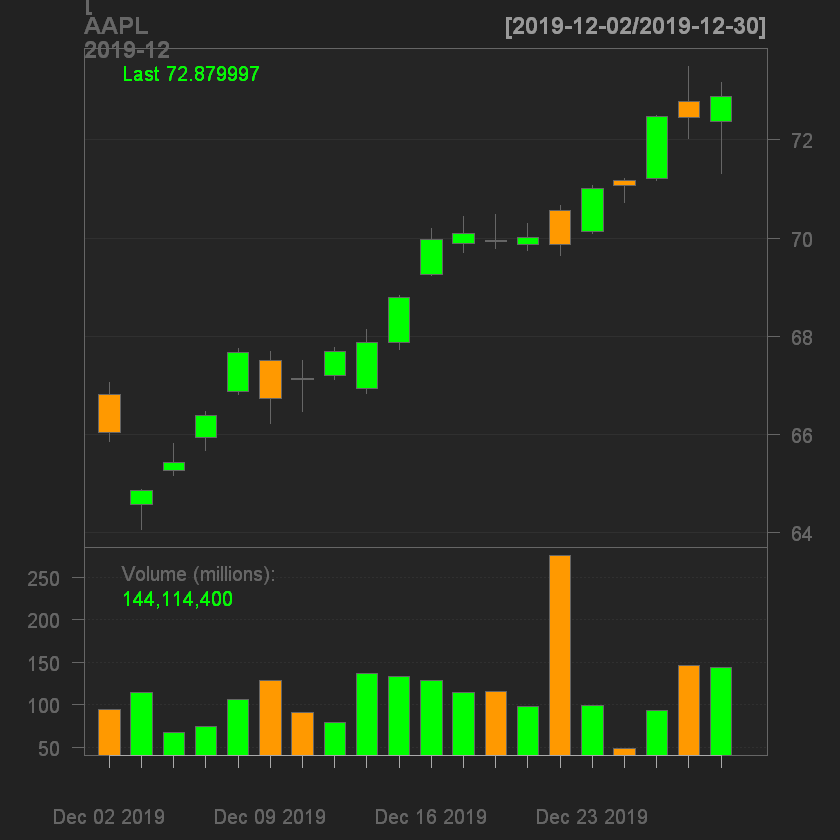

In [6]:
chartSeries(AAPL['2019-12'])

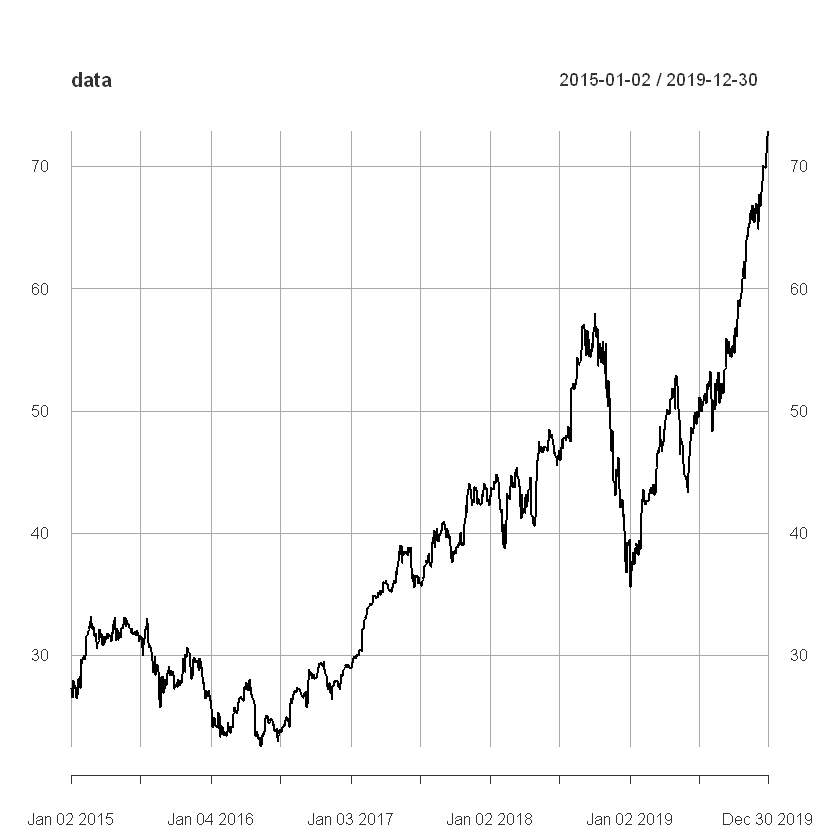

In [7]:
# Closing Prices
data <- AAPL$AAPL.Close
plot(data)

In [10]:
# ARIMA - Autoregressive Integrated Moving Average

model = auto.arima(data)
summary(model)

Series: data 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.0363
s.e.  0.0175

sigma^2 estimated as 0.3861:  log likelihood=-1184.12
AIC=2372.25   AICc=2372.26   BIC=2382.52

Training set error measures:
                       ME      RMSE       MAE         MPE     MAPE      MASE
Training set 2.171537e-05 0.6209149 0.4251315 -0.03563452 1.103922 0.9977347
                    ACF1
Training set 0.008693742


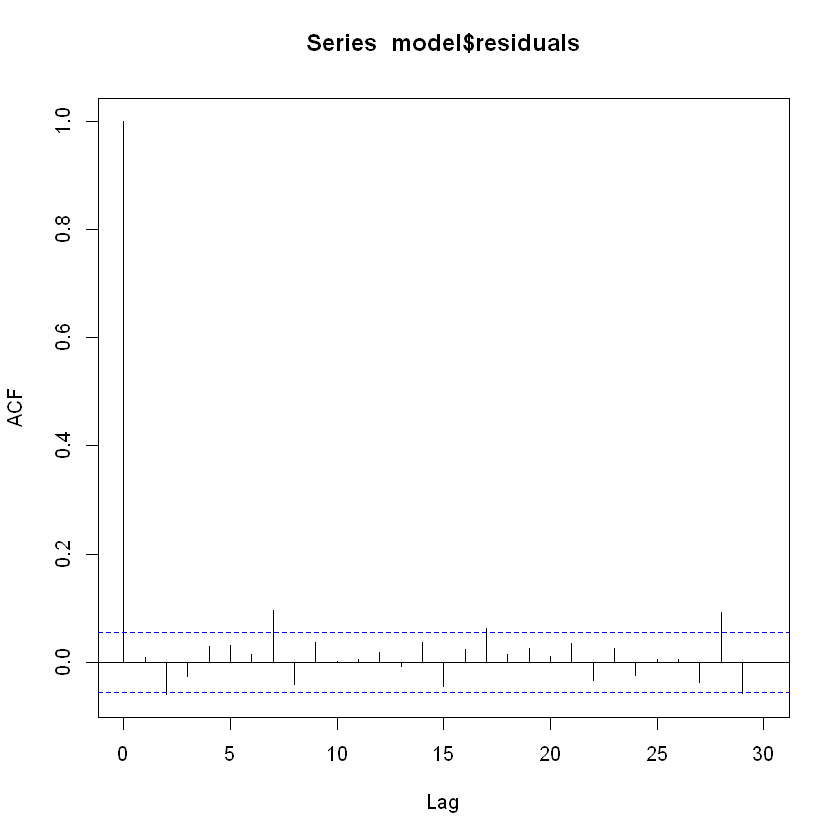

In [11]:
acf(model$residuals)

In [12]:
# Box-Ljung test
Box.test(model$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  model$residuals
X-squared = 34.915, df = 20, p-value = 0.02056


In [13]:
# Log-Transform the data to capture collinearity

data = log(data)

In [14]:
model = auto.arima(data)
summary(model)

Series: data 
ARIMA(2,1,0) with drift 

Coefficients:
         ar1      ar2  drift
      0.0085  -0.0514  8e-04
s.e.  0.0282   0.0282  4e-04

sigma^2 estimated as 0.000246:  log likelihood=3438.12
AIC=-6868.25   AICc=-6868.22   BIC=-6847.71

Training set error measures:
                       ME       RMSE        MAE          MPE      MAPE
Training set 1.567379e-06 0.01565945 0.01103576 -0.002059227 0.3074675
                  MASE         ACF1
Training set 0.9987559 -0.001471522


In [53]:
# Box-Ljung test
Box.test(model$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  model$residuals
X-squared = 24.197, df = 20, p-value = 0.2339


Null hypothesis is accepted as p value is statistically insignificant.
We say that collinearity has been captured into the model.

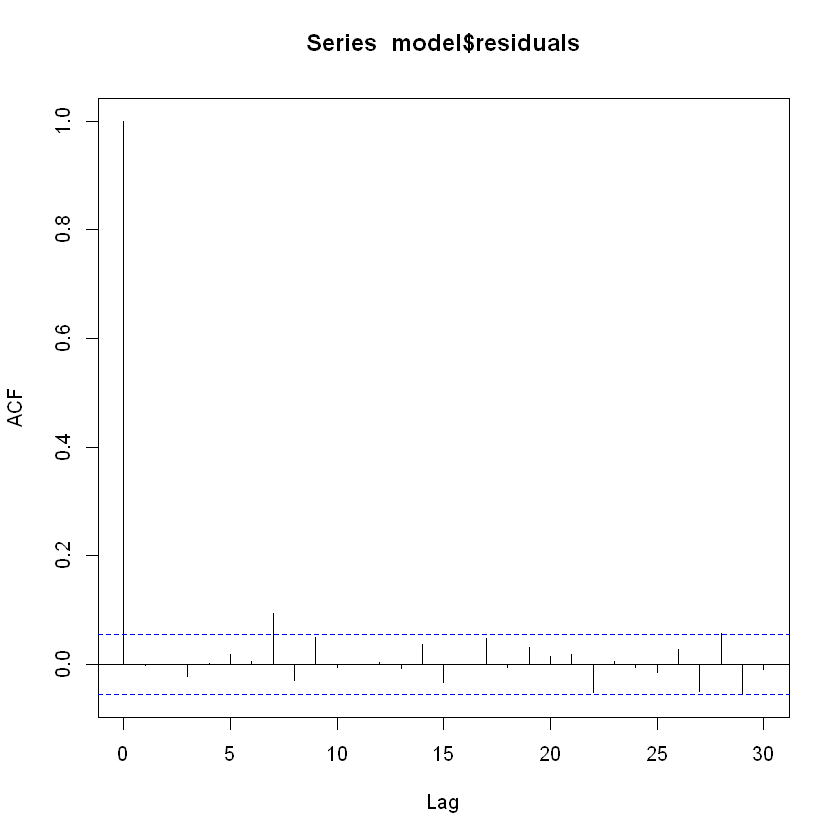

In [15]:
acf(model$residuals)

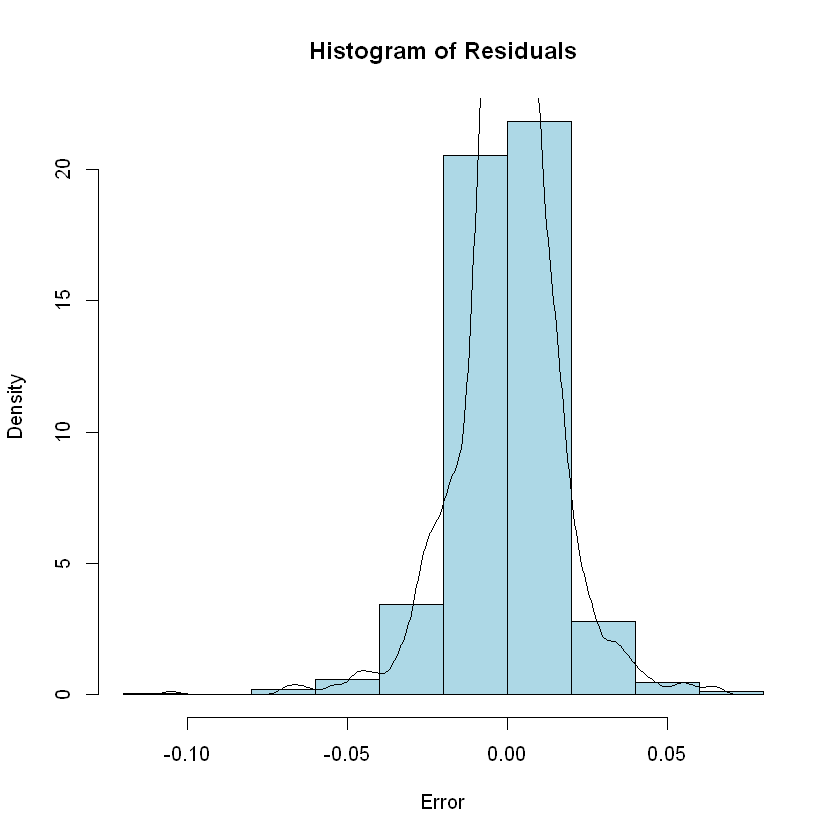

In [16]:
# Residual plot
hist(model$residuals,
     col = "lightblue",
     xlab = "Error",
     main = "Histogram of Residuals",
     freq = FALSE)
lines(density(model$residuals))

In [19]:
# Forecast
f <- forecast(model, 7)

f$x = exp(f$x)
f$mean = exp(f$mean)
f$lower = exp(f$lower)
f$upper = exp(f$upper)

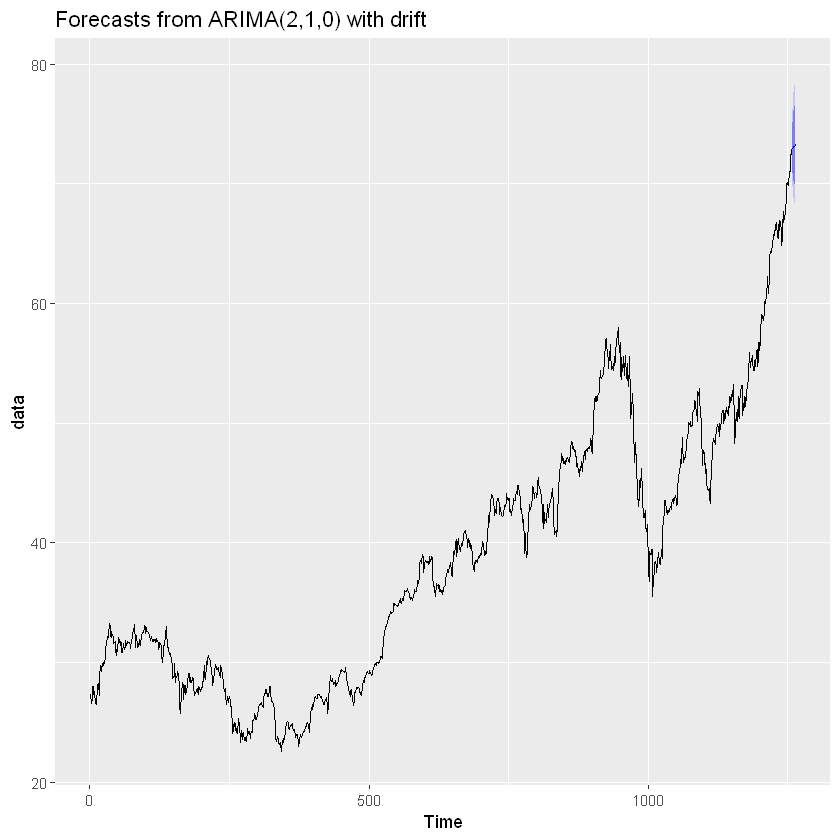

In [20]:
autoplot(f)

In [21]:
# Prediction Intervals for first 7 days of 2020
f

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1258       72.94455 71.49297 74.42560 70.73628 75.22175
1259       72.98238 70.92835 75.09590 69.86452 76.23939
1260       73.03891 70.56726 75.59712 69.29289 76.98744
1261       73.09701 70.27096 76.03672 68.81943 77.64047
1262       73.15422 70.01305 76.43631 68.40519 78.23294
1263       73.21138 69.78479 76.80622 68.03626 78.78013
1264       73.26863 69.57937 77.15351 67.70219 79.29274

In [26]:
getSymbols("AAPL", 
           from = "2020-01-01", 
           to = "2020-01-31")

[1] "AAPL"

In [27]:
# Actual Values
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2020-01-02   74.0600   75.1500  73.7975    75.0875   135480400      74.20747
2020-01-03   74.2875   75.1450  74.1250    74.3575   146322800      73.48602
2020-01-06   73.4475   74.9900  73.1875    74.9500   118387200      74.07158
2020-01-07   74.9600   75.2250  74.3700    74.5975   108872000      73.72321
2020-01-08   74.2900   76.1100  74.2900    75.7975   132079200      74.90915
2020-01-09   76.8100   77.6075  76.5500    77.4075   170108400      76.50028